In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/export.csv')

In [ ]:
df_clean = df.drop(['age','months_as_customer','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses', 'police_report_available','auto_make','auto_model','auto_year','property_damage'],axis = 'columns')
df_clean


,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,Major Damage,71610,6510,13020,52080,Y
1,Minor Damage,5070,780,780,3510,Y
2,Minor Damage,34650,7700,3850,23100,N
3,Major Damage,63400,6340,6340,50720,Y
4,Minor Damage,6500,1300,650,4550,N
...,...,...,...,...,...,...
995,Minor Damage,87200,17440,8720,61040,N
996,Major Damage,108480,18080,18080,72320,N
997,Minor Damage,67500,7500,7500,52500,N
998,Major Damage,46980,5220,5220,36540,N


In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   incident_severity   1000 non-null   object
 1   total_claim_amount  1000 non-null   int64 
 2   injury_claim        1000 non-null   int64 
 3   property_claim      1000 non-null   int64 
 4   vehicle_claim       1000 non-null   int64 
 5   fraud_reported      1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()                                     
df_clean['incident_severity']=encode.fit_transform(df['incident_severity'])
df_clean['incident_severity']=df_clean['incident_severity']
df_clean.head(5)

,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,71610,6510,13020,52080,Y
1,1,5070,780,780,3510,Y
2,1,34650,7700,3850,23100,N
3,0,63400,6340,6340,50720,Y
4,1,6500,1300,650,4550,N


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()                                     
df_clean['fraud_reported']=encode.fit_transform(df['fraud_reported'])
df_clean['fraud_reported']=df_clean['fraud_reported']
df_clean.head(5)


,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,71610,6510,13020,52080,1
1,1,5070,780,780,3510,1
2,1,34650,7700,3850,23100,0
3,0,63400,6340,6340,50720,1
4,1,6500,1300,650,4550,0


In [ ]:
X = df_clean.iloc[:, :-1].values
Y = df_clean.iloc[:, -1].values

In [ ]:
Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [ ]:
print(X_train)

[[-1.26794176  0.01759776 -0.3024347  -0.31449853  0.1830905 ]
 [ 0.85000104 -0.26761377 -0.66654466  0.1950205  -0.25072597]
 [-1.26794176  0.19623831 -0.32932918  0.87577132  0.13447313]
 ...
 [ 0.85000104  0.28057505  0.74024383 -0.4105554   0.30490103]
 [-0.20897036  0.01913115 -0.52586581  0.47901471  0.03990969]
 [-1.26794176 -0.49532297 -0.77826022 -0.03050432 -0.48152488]]


In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred=classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       180
           1       0.66      0.66      0.66        70

    accuracy                           0.81       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.81      0.81      0.81       250



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[156  24]
 [ 24  46]]


0.808

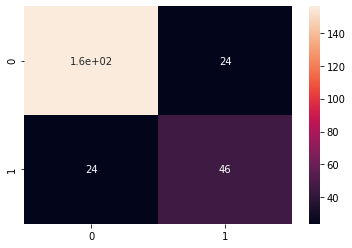

In [ ]:
import seaborn as sn
sn.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [ ]:
X[:, 1].size

1000

In [ ]:
X[:, 4].size

1000

No handles with labels found to put in legend.


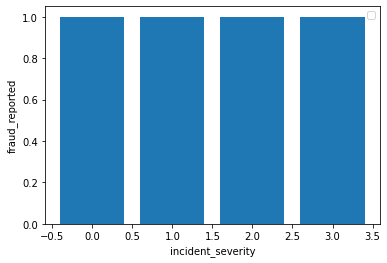

In [ ]:
plt.bar(X[:, 0], Y)
plt.xlabel("incident_severity")
plt.ylabel("fraud_reported")
plt.show()

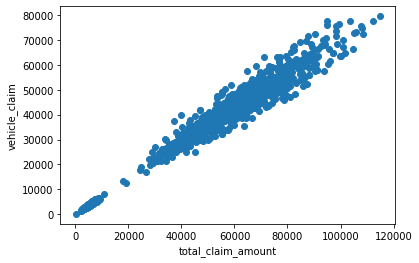

In [ ]:
plt.scatter(X[:, 1],X[:, 4])
plt.xlabel("total_claim_amount")
plt.ylabel("vehicle_claim")
plt.show()

(array([753.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

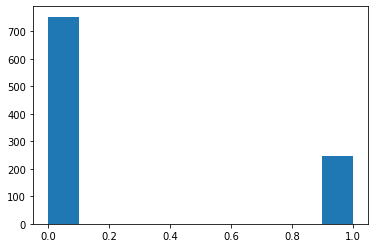

In [ ]:
plt.hist(Y)
plt.xlabel("Fraud_Reported")
plt.ylabel("Count")

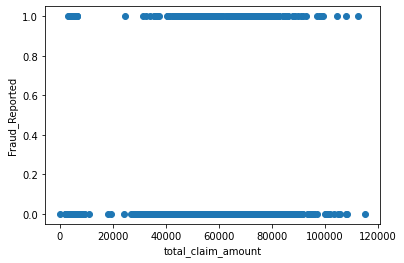

In [ ]:
plt.scatter(X[:, 1], Y)
plt.xlabel("total_claim_amount")
plt.ylabel("Fraud_Reported")
plt.show()

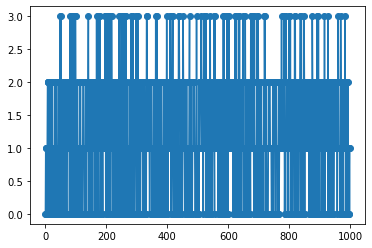

In [ ]:
plt.plot(X[:, :1], Y)